In [1]:
import pandas as pd
import numpy as np 

### load the data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_target = pd.read_csv('sample_submission.csv')

In [3]:
df_train.isna().sum()


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [4]:
df_test.isna().sum()


id             0
keyword       26
location    1105
text           0
dtype: int64

In [5]:
df_target.isna().sum()


id        0
target    0
dtype: int64

In [6]:
df_train.keyword = df_train.keyword.fillna(df_train.keyword.mode()[0])
df_test.keyword = df_test.keyword.fillna(df_test.keyword.mode()[0])
df_train = df_train.dropna()
df_test = df_test.dropna()

In [7]:
df_test['text'] = df_test['keyword'] + " "+df_test['location'] + " "+df_test['text']
df_train['text'] = df_train['keyword'] + " "+df_train['location'] + " "+df_train['text']

In [8]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [9]:
df_test = pd.merge(df_test, df_target, on='id')

###  Text Clean 

In [13]:
# Libraries and packages for text (pre-)processing 
import string
import re
import nltk

In [14]:
df_train["clean_text"] = df_train["text"].apply(lambda x: x.lower())
df_test["clean_text"] = df_test["text"].apply(lambda x: x.lower())


In [12]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 974.0 kB/s eta 0:00:00 eta 0:00:010:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 7.1 MB/s eta 0:00:00


In [15]:
import contractions

In [16]:
df_train["clean_text"] = df_train["clean_text"].apply(lambda x: contractions.fix(x))
df_test["clean_text"] = df_test["clean_text"].apply(lambda x: contractions.fix(x))


In [17]:
df_train["clean_text"]

0       ablaze birmingham @bbcmtd wholesale markets ab...
1       ablaze est. september 2012 - bristol we always...
2       ablaze africa #africanbaze: breaking news:nige...
3       ablaze philadelphia, pa crying out for more! s...
4       ablaze london, uk on plus side look at the sky...
                              ...                        
5075    wrecked tn on the bright side i wrecked http:/...
5076    wrecked #newcastleupontyne #uk @widda16 ... he...
5077    wrecked vancouver, canada three days off from ...
5078    wrecked london  #fx #forex #trading cramer: ig...
5079    wrecked lincoln @engineshed great atmosphere a...
Name: clean_text, Length: 5080, dtype: object

In [18]:
print(df_train["text"][1])
print(df_train["clean_text"][1])

ablaze Est. September 2012 - Bristol We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw
ablaze est. september 2012 - bristol we always try to bring the heavy. #metal #rt http://t.co/yao1e0xngw


In [19]:
print(df_test["text"][1])
print(df_test["clean_text"][1])

ablaze Niall's place | SAF 12 SQUAD | @sunkxssedharry will you wear shorts for race ablaze ?
ablaze niall's place | saf 12 squad | @sunkxssedharry will you wear shorts for race ablaze ?


In [20]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)



def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)


def remove_non_ascii(text):
    """
        Remove non-ASCII characters 
    """
    return re.sub(r'[^\x00-\x7f]',r'', text) # or ''.join([x for x in text if x in string.printable]) 


def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [21]:
%time
# apply Remove URLs
df_train["clean_text"] = df_train["clean_text"].apply(lambda x: remove_URL(x))
df_test["clean_text"] = df_test["clean_text"].apply(lambda x: remove_URL(x))

# apply Remove html
df_train["clean_text"] = df_train["clean_text"].apply(lambda x: remove_html(x))
df_test["clean_text"] = df_test["clean_text"].apply(lambda x: remove_html(x))

# apply Remove non-ASCII
df_train["clean_text"] = df_train["clean_text"].apply(lambda x: remove_non_ascii(x))
df_test["clean_text"] = df_test["clean_text"].apply(lambda x: remove_non_ascii(x))

# apply Remove punctuation
df_train["clean_text"] = df_train["clean_text"].apply(lambda x: remove_punct(x))
df_test["clean_text"] = df_test["clean_text"].apply(lambda x: remove_punct(x))

CPU times: user 15 μs, sys: 0 ns, total: 15 μs
Wall time: 34.1 μs


###  Text Preprocessing 

In [23]:
%time
# Tokenizing the tweet base texts.
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df_train['tokenized'] = df_train['clean_text'].apply(word_tokenize)
df_test['tokenized'] = df_test['clean_text'].apply(word_tokenize)


CPU times: user 5 μs, sys: 1e+03 ns, total: 6 μs
Wall time: 13.6 μs


[nltk_data] Downloading package punkt to /home/aboud/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
# Removing stopwords.
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
df_train['stopwords_removed'] = df_train['tokenized'].apply(lambda x: [word for word in x if word not in stop])
df_test['stopwords_removed'] = df_test['tokenized'].apply(lambda x: [word for word in x if word not in stop])


[nltk_data] Downloading package stopwords to /home/aboud/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer


def porter_stemmer(text):
    """
        Stem words in list of tokenized words with PorterStemmer
    """
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

def lancaster_stemmer(text):
    """
        Stem words in list of tokenized words with LancasterStemmer
    """
    stemmer = nltk.LancasterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

def snowball_stemmer(text):
    """
        Stem words in list of tokenized words with SnowballStemmer
    """
    stemmer = nltk.SnowballStemmer("english")
    stems = [stemmer.stem(i) for i in text]
    return stems




In [27]:
%time 

df_train['porter_stemmer'] = df_train['stopwords_removed'].apply(lambda x: porter_stemmer(x))
df_test['porter_stemmer'] = df_test['stopwords_removed'].apply(lambda x: porter_stemmer(x))

df_train['lancaster_stemmer'] = df_train['stopwords_removed'].apply(lambda x: lancaster_stemmer(x))
df_test['lancaster_stemmer'] = df_test['stopwords_removed'].apply(lambda x: lancaster_stemmer(x))

df_train['snowball_stemmer'] = df_train['stopwords_removed'].apply(lambda x: snowball_stemmer(x))
df_test['snowball_stemmer'] = df_test['stopwords_removed'].apply(lambda x: snowball_stemmer(x))


CPU times: user 14 μs, sys: 4 μs, total: 18 μs
Wall time: 33.9 μs


In [29]:
# Uncomments if u havent download it yet

nltk.download('brown')
nltk.download('wordnet')

from nltk.corpus import wordnet
from nltk.corpus import brown

wordnet_map = {"N":wordnet.NOUN, 
               "V":wordnet.VERB, 
               "J":wordnet.ADJ, 
               "R":wordnet.ADV
              }
    
train_sents = brown.tagged_sents(categories='news')

# fallback for unknown words.
t0 = nltk.DefaultTagger('NN')

# Creates a unigram tagger
t1 = nltk.UnigramTagger(train_sents, backoff=t0)

# Creates a bigram tagger
t2 = nltk.BigramTagger(train_sents, backoff=t1)

def pos_tag_wordnet(text, pos_tag_type="pos_tag"):
    """
        Create pos_tag with wordnet format
    """
    pos_tagged_text = t2.tag(text)
    
    # map the pos tagging output with wordnet output 
    pos_tagged_text = [(word, wordnet_map.get(pos_tag[0])) if pos_tag[0] in wordnet_map.keys() else (word, wordnet.NOUN) for (word, pos_tag) in pos_tagged_text ]
    return pos_tagged_text

[nltk_data] Downloading package brown to /home/aboud/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to /home/aboud/nltk_data...


In [30]:
%time 
# Apply part of speech tag without wordnet on train and test data 
df_train['combined_postag_wnet'] = df_train['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))
df_test['combined_postag_wnet'] = df_test['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))


CPU times: user 7 μs, sys: 1e+03 ns, total: 8 μs
Wall time: 14.5 μs


In [31]:
from nltk.stem import WordNetLemmatizer

def lemmatize_word(text):
    """
        Lemmatize the tokenized words
    """

    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

In [32]:
# Test without POS Tagging
lemmatizer = WordNetLemmatizer()

df_train['lemmatize_word_wo_pos'] = df_train['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_train['lemmatize_word_wo_pos'] = df_train['lemmatize_word_wo_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words

df_test['lemmatize_word_wo_pos'] = df_test['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_test['lemmatize_word_wo_pos'] = df_test['lemmatize_word_wo_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words



In [33]:
%time 

# Test with POS Tagging
lemmatizer = WordNetLemmatizer()

df_train['lemmatize_word_w_pos'] = df_train['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
df_train['lemmatize_word_w_pos'] = df_train['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words
df_train['lemmatize_text'] = [' '.join(map(str, l)) for l in df_train['lemmatize_word_w_pos']] # join back to text


df_test['lemmatize_word_w_pos'] = df_test['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
df_test['lemmatize_word_w_pos'] = df_test['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words
df_test['lemmatize_text'] = [' '.join(map(str, l)) for l in df_test['lemmatize_word_w_pos']] # join back to text


CPU times: user 6 μs, sys: 1e+03 ns, total: 7 μs
Wall time: 13.4 μs


In [34]:


print(df_train["text"][31])
print(df_train["combined_postag_wnet"][31])
print(df_train["lemmatize_word_wo_pos"][31])
print(df_train["lemmatize_word_w_pos"][31])



accident Santa Clara, CA Accident center lane blocked in #SantaClara on US-101 NB before Great America Pkwy #BayArea #Traffic http://t.co/pmlOhZuRWR
[('accident', 'n'), ('santa', 'n'), ('clara', 'n'), ('ca', 'n'), ('accident', 'n'), ('center', 'n'), ('lane', 'n'), ('blocked', 'v'), ('santaclara', 'n'), ('us101', 'n'), ('nb', 'n'), ('great', 'a'), ('america', 'n'), ('pkwy', 'n'), ('bayarea', 'n'), ('traffic', 'n')]
['accident', 'santa', 'clara', 'ca', 'accident', 'center', 'lane', 'blocked', 'santaclara', 'us101', 'nb', 'great', 'america', 'pkwy', 'bayarea', 'traffic']
['accident', 'santa', 'clara', 'ca', 'accident', 'center', 'lane', 'block', 'santaclara', 'us101', 'nb', 'great', 'america', 'pkwy', 'bayarea', 'traffic']


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def cv(train , test,  ngram = 1, MAX_NB_WORDS = 75000):
    count_vectorizer = CountVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    train_vectorize = count_vectorizer.fit_transform(train).toarray()
    test_vectorize =  count_vectorizer.transform(test).toarray()
#    print("count vectorize with", str(np.array(train_vectorize).shape[1]), "features")
#    print("count vectorize with", str(np.array(test_vectorize).shape[1]), "features")
    
    return train_vectorize , test_vectorize , count_vectorizer

def tf(train , test):
    tf_vectorizer = TfidfVectorizer()
    train_vectorize = tf_vectorizer.fit_transform(train).toarray()
    test_vectorize = tf_vectorizer.transform(test).toarray()
    columns = tf_vectorizer.get_feature_names_out()
    return train_vectorize , test_vectorize , tf_vectorizer


In [53]:
for col in df_train.columns[5:]:
    print(col + " " , type(df_train[col][0][0]))
    print(col + " " , type(df_train[col][0]))
    

clean_text  <class 'str'>
clean_text  <class 'str'>
tokenized  <class 'str'>
tokenized  <class 'list'>
stopwords_removed  <class 'str'>
stopwords_removed  <class 'list'>
porter_stemmer  <class 'str'>
porter_stemmer  <class 'list'>
lancaster_stemmer  <class 'str'>
lancaster_stemmer  <class 'list'>
snowball_stemmer  <class 'str'>
snowball_stemmer  <class 'list'>
combined_postag_wnet  <class 'tuple'>
combined_postag_wnet  <class 'list'>
lemmatize_word_wo_pos  <class 'str'>
lemmatize_word_wo_pos  <class 'list'>
lemmatize_word_w_pos  <class 'str'>
lemmatize_word_w_pos  <class 'list'>
lemmatize_text  <class 'str'>
lemmatize_text  <class 'str'>


In [ ]:
# conditions we need to ignore for now 
# 1 - type(df_train[col][0][0] == "tuple" 

In [31]:
df_train_em_1gram, df_test_em_1gram ,  vc_1gram = cv(df_train["clean_text"] ,df_test["clean_text"] , 1)
# train_df_em_2gram, vc_2gram = cv(train_df_corpus, 2)
# train_df_em_3gram, vc_3gram = cv(train_df_corpus, 3)

# print(len(train_df_corpus))
print(df_train_em_1gram.shape)
print(df_test_em_1gram.shape)

# print(train_df_em_2gram.shape)
# print(train_df_em_3gram.shape)


count vectorize with 15761 features
count vectorize with 15761 features
(5080, 15761)
(2158, 15761)


In [52]:
# ok after we look to the target value counts 
# Note : the target in test dataframe has only 1 unique value and its : 0
# there is no ones 

# we decided to concate the test dataframe and the train dataframe 
# to create one dataframe and then create our own test by split them 

df = pd.concat([df_train, df_test], axis=0)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

In [39]:
y_train = df_train["target"] 
y_test = df_test["target"]

In [40]:
df_train_em_1gram, y_train = SMOTE().fit_resample(df_train_em_1gram, y_train) 

NameError: name 'df_train_em_1gram' is not defined

In [ ]:
# set y
y = df["target"] 


for col in df_train.columns[5:]:
    # we will ignore that column for now 
    if type(df_train[col][0][0]) == tuple:
        continue
        
    # join words   
    if type(df_train[col][0]) == list:
        X = df[col].apply(lambda x : " ".join(x))
        
        # train = df_train[col].apply(lambda x : " ".join(x))
        # test = df_test[col].apply(lambda x : " ".join(x))
    else:
        X = df[col]
        
        # train = df_train[col]
        # test = df_test[col]
    


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # let convert them to numbers using cv 
    X_train, X_test ,  vc_1gram = cv(X_train ,X_test , 1)

    RandomForest_model = RandomForestClassifier()
    RandomForest_model.fit(X_train, y_train)
    y_pred_rf = RandomForest_model.predict(X_test)
    RandomForest_model_accurcy = accuracy_score(y_test, y_pred_rf)
    print(col + " : " , RandomForest_model_accurcy)
    
    
    LogisticRegression_model = LogisticRegression()
    LogisticRegression_model.fit(X_train, y_train)
    y_pred_lg = LogisticRegression_model.predict(X_test)
    LogisticRegression_model_accurcy = accuracy_score(y_test, y_pred_lg)
    print(col + " : " , LogisticRegression_model_accurcy)
    
    
    GaussianNB_model = GaussianNB()
    GaussianNB_model.fit(X_train, y_train)
    y_pred_gnb = GaussianNB_model.predict(X_test)
    GaussianNB_model_accurcy = accuracy_score(y_test, y_pred_gnb)
    print(col + " : " , GaussianNB_model_accurcy)
    
    
    KNeighborsClassifier_model = RandomForestClassifier()
    KNeighborsClassifier_model.fit(X_train, y_train)
    y_pred_knn = KNeighborsClassifier_model.predict(X_test)
    KNeighborsClassifier_model_accurcy = accuracy_score(y_test, y_pred_knn)
    print(col + " : " , KNeighborsClassifier_model_accurcy)

    DecisionTreeClassifier_model = DecisionTreeClassifier()
    DecisionTreeClassifier_model.fit(X_train, y_train)
    y_pred_dt = DecisionTreeClassifier_model.predict(X_test)
    DecisionTreeClassifier_model_accurcy = accuracy_score(y_test, y_pred_dt)
    print(col + " : " , DecisionTreeClassifier_model_accurcy)




clean_text :  0.7403314917127072
clean_text :  0.744475138121547
clean_text :  0.6049723756906077
clean_text :  0.7465469613259669
clean_text :  0.6857734806629834


In [51]:
# set y train and y_test  
y_train = df_train["target"] 
y_test = df_test["target"]

for col in df_train.columns[5:]:
    # we will ignore that column for now 
    if type(df_train[col][0][0]) == tuple:
        continue
        
    # join words   
    if type(df_train[col][0]) == list:
        train = df_train[col].apply(lambda x : " ".join(x))
        test = df_test[col].apply(lambda x : " ".join(x))
    else:
        train = df_train[col]
        test = df_test[col]
    
    
    # let convert them to numbers using cv 
    df_train_em_1gram, df_test_em_1gram ,  vc_1gram = cv(train ,test , 1)

    RandomForest_model = RandomForestClassifier()
    RandomForest_model.fit(df_train_em_1gram, y_train)
    y_pred_rf = RandomForest_model.predict(df_test_em_1gram)
    RandomForest_model_accurcy = accuracy_score(y_test, y_pred_rf)
    print(col + " : " , RandomForest_model_accurcy)
    
    
    LogisticRegression_model = LogisticRegression()
    LogisticRegression_model.fit(df_train_em_1gram, y_train)
    y_pred_lg = LogisticRegression_model.predict(df_test_em_1gram)
    LogisticRegression_model_accurcy = accuracy_score(y_test, y_pred_lg)
    print(col + " : " , LogisticRegression_model_accurcy)
    
    
    GaussianNB_model = GaussianNB()
    GaussianNB_model.fit(df_train_em_1gram, y_train)
    y_pred_gnb = GaussianNB_model.predict(df_test_em_1gram)
    GaussianNB_model_accurcy = accuracy_score(y_test, y_pred_gnb)
    print(col + " : " , GaussianNB_model_accurcy)
    
    
    KNeighborsClassifier_model = RandomForestClassifier()
    KNeighborsClassifier_model.fit(df_train_em_1gram, y_train)
    y_pred_knn = KNeighborsClassifier_model.predict(df_test_em_1gram)
    KNeighborsClassifier_model_accurcy = accuracy_score(y_test, y_pred_knn)
    print(col + " : " , KNeighborsClassifier_model_accurcy)

    DecisionTreeClassifier_model = DecisionTreeClassifier()
    DecisionTreeClassifier_model.fit(df_train_em_1gram, y_train)
    y_pred_dt = DecisionTreeClassifier_model.predict(df_test_em_1gram)
    DecisionTreeClassifier_model_accurcy = accuracy_score(y_test, y_pred_dt)
    print(col + " : " , DecisionTreeClassifier_model_accurcy)




clean_text :  0.6886005560704356
clean_text :  0.6367006487488415
clean_text :  0.4397590361445783
clean_text :  0.6853568118628359
clean_text :  0.5783132530120482
tokenized :  0.6853568118628359
tokenized :  0.6353104726598703
tokenized :  0.4397590361445783
tokenized :  0.6923076923076923
tokenized :  0.5713623725671918
stopwords_removed :  0.6427247451343837
stopwords_removed :  0.6506024096385542
stopwords_removed :  0.4397590361445783
stopwords_removed :  0.6496756255792401
stopwords_removed :  0.5750695088044485
porter_stemmer :  0.6376274328081557
porter_stemmer :  0.6376274328081557
porter_stemmer :  0.4170528266913809
porter_stemmer :  0.6431881371640408
porter_stemmer :  0.5778498609823911
lancaster_stemmer :  0.6302131603336423
lancaster_stemmer :  0.6394810009267841
lancaster_stemmer :  0.386468952734013
lancaster_stemmer :  0.6311399443929564
lancaster_stemmer :  0.577386468952734
snowball_stemmer :  0.6329935125115848
snowball_stemmer :  0.6367006487488415
snowball_stemm

In [35]:
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(df_train_em_1gram, y_train)
y_pred_rf = model_RandomForest.predict(df_test_em_1gram)
model_RandomForest_accurcy = accuracy_score(y_test, y_pred_rf)

In [36]:
model_RandomForest_accurcy

0.5588507877664504

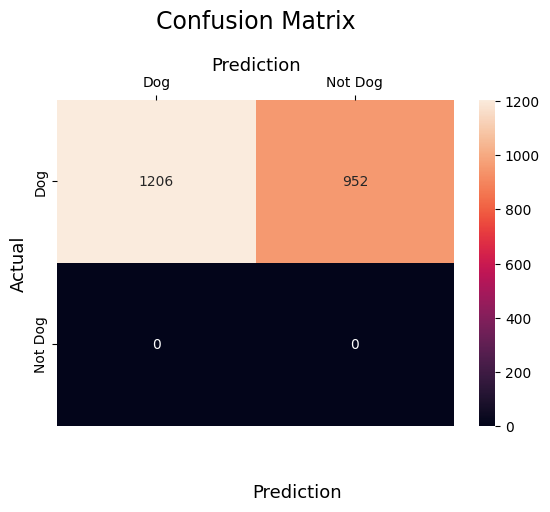

In [37]:
cm = confusion_matrix(y_test,y_pred_rf)

sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Dog','Not Dog'], yticklabels=['Dog','Not Dog']) 
plt.ylabel('Actual', fontsize=13) 
plt.title('Confusion Matrix', fontsize=17, pad=20) 
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13) 
plt.gca().xaxis.tick_top() 
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [38]:
y = df_train["target"]

In [39]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
# Sample data
data = [('aboud', 'N'), ('like', 'adj'), ('footbool', 'N')]

# Tokenize the data and create encodings
words, pos_tags = zip(*data)
vectorizer = CountVectorizer()
vectorizer.fit(words)
vocab = vectorizer.vocabulary_
word_encodings = [vocab[word] for word in words]
le = LabelEncoder()
le.fit(pos_tags)
pos_encodings = le.transform(pos_tags)
X = list(zip(word_encodings, pos_encodings))
y = [0, 1, 0]  # Assuming you have a target variable

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions
new_data = [('aboud', 'N'), ('like', 'adj')]
new_words, new_pos_tags = zip(*new_data)
new_word_encodings = [vocab[word] for word in new_words]
new_pos_encodings = le.transform(new_pos_tags)
new_X = list(zip(new_word_encodings, new_pos_encodings))
predictions = model.predict(new_X)
print(predictions)

[0 1]


In [40]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

# implement into the whole dataset
train_df_corpus = df_train["lemmatize_text"].tolist()
train_df_em_1gram, vc_1gram = cv(train_df_corpus, 1)


model = LogisticRegression()
model.fit(train_df_em_1gram[:4000], y[:4000])
y_pred = model.predict(train_df_em_1gram[4000:])


cm = confusion_matrix(y[4000:],y_pred)

sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Dog','Not Dog'], yticklabels=['Dog','Not Dog']) 
plt.ylabel('Actual', fontsize=13) 
plt.title('Confusion Matrix', fontsize=17, pad=20) 
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13) 
plt.gca().xaxis.tick_top() 
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

TypeError: 'int' object is not iterable

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

# implement into the whole dataset
train_df_corpus = df_train["porter_stemmer"].apply(lambda x : " ".join(x))
train_df_em_1gram, vc_1gram = cv(train_df_corpus, 1)


model = LogisticRegression()
model.fit(train_df_em_1gram[:4000], y[:4000])
y_pred = model.predict(train_df_em_1gram[4000:])


cm = confusion_matrix(y[4000:],y_pred)

sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Dog','Not Dog'], yticklabels=['Dog','Not Dog']) 
plt.ylabel('Actual', fontsize=13) 
plt.title('Confusion Matrix', fontsize=17, pad=20) 
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13) 
plt.gca().xaxis.tick_top() 
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

# implement into the whole dataset
train_df_corpus = df_train["lancaster_stemmer"].apply(lambda x : " ".join(x))
train_df_em_1gram, vc_1gram = cv(train_df_corpus, 1)


model = LogisticRegression()
model.fit(train_df_em_1gram[:4000], y[:4000])
y_pred = model.predict(train_df_em_1gram[4000:])


cm = confusion_matrix(y[4000:],y_pred)

sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Dog','Not Dog'], yticklabels=['Dog','Not Dog']) 
plt.ylabel('Actual', fontsize=13) 
plt.title('Confusion Matrix', fontsize=17, pad=20) 
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13) 
plt.gca().xaxis.tick_top() 
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

# implement into the whole dataset
train_df_corpus = df_train["snowball_stemmer"].apply(lambda x : " ".join(x))
train_df_em_1gram, vc_1gram = cv(train_df_corpus, 1)


model = LogisticRegression()
model.fit(train_df_em_1gram[:4000], y[:4000])
y_pred = model.predict(train_df_em_1gram[4000:])


cm = confusion_matrix(y[4000:],y_pred)

sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Dog','Not Dog'], yticklabels=['Dog','Not Dog']) 
plt.ylabel('Actual', fontsize=13) 
plt.title('Confusion Matrix', fontsize=17, pad=20) 
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13) 
plt.gca().xaxis.tick_top() 
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [ ]:
df_train

In [ ]:
data = df_train["combined_postag_wnet"]

# Create a vocabulary of tokens and their corresponding indices
token_to_idx = {}
idx_to_token = {}
pos_to_idx = {}
idx_to_pos = {}

# Iterate through the data and build the vocabularies
for example in data:
    for token, pos in example:
        if token not in token_to_idx:
            token_idx = len(token_to_idx)
            token_to_idx[token] = token_idx
            idx_to_token[token_idx] = token
        if pos not in pos_to_idx:
            pos_idx = len(pos_to_idx)
            pos_to_idx[pos] = pos_idx
            idx_to_pos[pos_idx] = pos

# Encode the data
X_token = [[token_to_idx[token] for token, _ in example] for example in data]
X_pos = [[pos_to_idx[pos] for _, pos in example] for example in data]

In [ ]:
data = df_train["combined_postag_wnet"]
words = []
pos_tags = []

In [ ]:
for i in list(zip(*data))[0]:
    words.append(i[0]) , pos_tags.append(i[1])

In [ ]:
vocab

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
# Sample data
data = df_train["combined_postag_wnet"]
# Tokenize the data and create encodings
vectorizer = CountVectorizer()
vectorizer.fit(words)
vocab = vectorizer.vocabulary_
word_encodings = [vocab[word] for word in words]
le = LabelEncoder()
le.fit(pos_tags)
pos_encodings = le.transform(pos_tags)
X = list(zip(word_encodings, pos_encodings))
y = df_train["target"] # Assuming you have a target variable

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions
new_data = [('aboud', 'N'), ('like', 'adj')]
new_words, new_pos_tags = zip(*new_data)
new_word_encodings = [vocab[word] for word in new_words]
new_pos_encodings = le.transform(new_pos_tags)
new_X = list(zip(new_word_encodings, new_pos_encodings))
predictions = model.predict(new_X)
print(predictions)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate

max_seq_len = max(len(example) for example in X_token)

# Pad the sequences to the max length
X_token = tf.keras.preprocessing.sequence.pad_sequences(X_token, maxlen=max_seq_len, padding='post')
X_pos = tf.keras.preprocessing.sequence.pad_sequences(X_pos, maxlen=max_seq_len, padding='post')

# Assuming you have labels in another column
y = df_train["target"].values

# Define the input layers
token_input = Input(shape=(max_seq_len,), name='token_input')
pos_input = Input(shape=(max_seq_len,), name='pos_input')

# Define the embedding layers
token_embedding = Embedding(len(token_to_idx), 64, input_length=max_seq_len, name='token_embedding')(token_input)
pos_embedding = Embedding(len(pos_to_idx), 32, input_length=max_seq_len, name='pos_embedding')(pos_input)

# Concatenate the embeddings
combined_input = Concatenate(name='combined_input')([token_embedding, pos_embedding])

# Define the dense layers
x = Dense(128, activation='relu', name='dense1')(combined_input)
x = Dense(64, activation='relu', name='dense2')(x)
output = Dense(24, activation='sigmoid', name='output')(x)

# Create the model
model = Model(inputs=[token_input, pos_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_token, X_pos], y, epochs=100, batch_size=32, verbose=0)

# Make predictions
new_data_token = [[token_to_idx[token] for token, _ in example] for example in new_data]
new_data_pos = [[pos_to_idx[pos] for _, pos in example] for example in new_data]

new_predictions = model.predict([new_data_token, new_data_pos])
print(new_predictions)